In [93]:
import pandas as pd
import math
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics

from sklearn.utils import resample
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error
from sklearn.datasets import make_regression

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.neural_network import MLPClassifier

from xgboost import XGBClassifier


# **MODEL CREATION** #

''' Hacer orimero que cada palabra de la columna messages sea una linea de un nuevo dataframe.
mirar las palabras mas repetidas.
Asociar valores a las palabras y crear dataframe
en mi dataframe pero copia poner columna por cada tag que encuentre.
despues a partir de aquí asociarle emociones
y construir el modelo.'''

'''NLP LEMMATIZATION
generar nova columna per lemmatization stemming'''

'''Trobar formula del sample minim que necessito per ser representatiu
per agafar el sample random 
llistat emocions dataframe

dels 1000 missatges anar un per un i classificar

entreno sobre els 1000 per trobar el millor model

entreno despres sobre tot el sample i despres ja li poso a tot el meu dataset

fer bootstrapping i fer el m, bootstrapping statistics'''

x boost, random forest, 
amarquescancio@gmail.com

In [2]:
df = pd.read_csv("../data/translation/completo.csv")

In [3]:
df.shape

(118752, 4)

## FIND THE MINIMUM REPRESENTATIVE SAMPLE

In [4]:
import math

# Datos
N = 118752  # Tamaño total de la población
Z = 1.96    # Valor crítico para un nivel de confianza del 95%
E = 0.05    # Margen de error del 5%
p = 0.5     # Estimación de la proporción

# Fórmula para calcular el tamaño de la muestra
n = (N * Z**2 * p * (1 - p)) / ((E**2 * (N - 1)) + Z**2 * p * (1 - p))

# Redondear hacia arriba ya que no puedes tener fracciones de personas en tu muestra
n = math.ceil(n)

print(f"Min necessary sample: {n}")


Min necessary sample: 383


Even though it says the minimmum sample can be 383 I'm going to catch 1000 to be sure to cover all 3 languages.

audio, image, video = neutral

In [27]:
def get_random_df(df):

    df = df[(df["message"].str.lower() != "\u200eaudio ") & (df["message"].str.lower() != "\u200evideo ")]
    df = df[df["message"].str.lower() != "\u200eimage "] 

    sample_df = df.sample(n=1000, random_state=42, ignore_index=True)
    return sample_df

sdf = get_random_df(df)

In [28]:
sdf.sample(30)

,date,time,name,message
41,2018-12-13,12:53:57,Em,Hola amor
771,2021-07-22,12:00:55,Em,‎You deleted this message.
828,2021-07-09,13:53:54,Em,Si o no
152,2017-10-10,18:16:19,Em,Sisi tranqui
407,2023-01-08,19:17:40,Em,Amigaaa perooo quieres que nos veamos?
964,2017-06-16,20:27:10,Em,Dormimos juntos hoy?
940,2019-12-25,20:22:54,Em,A veure que tal
529,2020-12-16,11:53:58,Em,Thxxxx
883,2021-12-10,23:36:21,Em,‎sticker
64,2021-06-06,12:43:18,Em,Seria en espanyol


## PREPARE TO MANUALLY INPUT THE CLASSIFICATED EMOTIONS FOR THIS SAMPLE

In [25]:
sdf['classification'] = None

In [31]:
sdf.to_csv("../data/translation/to_classify.csv")

In [39]:
emotions= [{"sadness":1},
           {"joy":2},
           {"fear":3},
           {"anger":4},
           {"surprise":5},
           {"defensive":6},
           {"nostalgia":7},
           {"hapiness":8},
           {"stressed":9},
           {"expectant":10},
           {"insecure":11},
           {"assertivity":12},
           {"neutral":13},
           {"excitement":14},
           {"comprehensive":15},
           {"helpless":16},
           {"love":17},
           {"deception":18},
           {"doubtful":19},
           {"picarona":20}]

## IMPORT THE LABELED DF

In [47]:
cdf = pd.read_csv("../data/translation/classified.csv", sep=";")
cdf.drop(columns="Unnamed: 0", inplace=True)
cdf

,date,time,name,message,emotion
0,2023-04-09,13:33:57,Em,Quan acabo et truco,12
1,2019-12-04,17:32:34,Em,Tia pero escucha haz abdominales si queires ha...,14
2,2020-06-16,17:12:10,Em,Si ara mateix,9
3,2018-08-07,15:10:52,Em,41577827Z,13
4,2019-03-10,10:57:46,Em,Ya me contaras como ha ido,10
...,...,...,...,...,...
995,2021-11-25,21:14:54,Em,Quina vidaaa!!! Estic same literal,8
996,2023-08-03,23:22:13,Em,Como ha ido tu diaa?,15
997,2020-07-02,13:38:15,Em,Okay,13
998,2021-02-02,20:54:18,Em,Etc,13


I need to associate power to some and less to others. neutral 13 and 12 less value.

## MODEL CHOOSING

DICTIONARY WITH EMOTIONS

In [81]:
emotions_2 = {list(i.values())[0]: list(i.keys())[0] for i in emotions}
emotions_2

{1: 'sadness',
 2: 'joy',
 3: 'fear',
 4: 'anger',
 5: 'surprise',
 6: 'defensive',
 7: 'nostalgia',
 8: 'hapiness',
 9: 'stressed',
 10: 'expectant',
 11: 'insecure',
 12: 'assertivity',
 13: 'neutral',
 14: 'excitement',
 15: 'comprehensive',
 16: 'helpless',
 17: 'love',
 18: 'deception',
 19: 'doubtful',
 20: 'picarona'}

In [94]:
def many_models_at_once (df, test_size=0.2, n_iterations=1000):

    '''Function to find out what's the best model
    It takes 1 arg:
    - df
    '''
    
    X = df["message"]
    y = df["emotion"]
    
    # 0. Train / test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size)

    # Vectorize
    vectorizer = TfidfVectorizer()
    X_train_tfidf = vectorizer.fit_transform(X_train)
    X_test_tfidf = vectorizer.transform(X_test)
    
    models = {
        "lr": LogisticRegression(),
        "multinomial": MultinomialNB(),
        "neural_net": MLPClassifier(), 
        "gaussian": GaussianNB(),
        "knc": KNeighborsClassifier(),
        "grad": GradientBoostingClassifier(random_state=42),
        "tree": DecisionTreeClassifier(),
        "forest": RandomForestClassifier(random_state=42),
        "svc": SVC(kernel='poly'),
        "xgcb": XGBClassifier()#potato chip
    }
  
    for model in models.values():

        #.Bootstrapping
        accuracy_bootstrap = []

        for _ in range(n_iterations):
            X_bs, y_bs = resample(X_train_tfidf, y_train)
            model.fit(X_bs, y_bs)
            y_pred = model.predict(X_test_tfidf)
            accuracy = metrics.accuracy_score(y_test, y_pred)
            accuracy_bootstrap.append(accuracy)


    for name, model in models.items():

        print(f"------------{name}------------\n")
        print(f"Average Accuracy: {np.mean(accuracy_bootstrap):.4f}")
        print(f"Standard Deviation: {np.std(accuracy_bootstrap):.4f}")

        # Additional metrics if needed
        print(f"Precision: {metrics.precision_score(y_test, y_pred, average='weighted'):.4f}")
        print(f"Recall: {metrics.recall_score(y_test, y_pred, average='weighted'):.4f}")
        print(f"F1 Score: {metrics.f1_score(y_test, y_pred, average='weighted'):.4f}")
        print("\n")
        
many_models_at_once (cdf, test_size = 0.2, n_iterations=1000)

mcajklnflv

In [83]:
X_train, X_test, y_train, y_test = train_test_split(cdf["message"], cdf["emotion"], test_size=0.25, random_state=42)


vectorizer = TfidfVectorizer() # mirar parameters, buena info para tableau. count words...
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Diferentes modelos
# Bootstraping
clf = MultinomialNB() #bayes
clf.fit(X_train_tfidf, y_train)


# Make predictions
predictions = clf.predict(X_test_tfidf)


def test_on_new_df ():
    """fer estaba haciendo pruebas"""
    df_2 = df.copy()
    df_2.dropna(inplace=True)
    X = vectorizer.transform(df_2["message"])
    df_2["new"] = clf.predict(X)
    df_2["new_2"] = df_2["new"].map(emotions_2)
    return df_2
df_2 = test_on_new_df ()
df_2

,date,time,name,message,new,new_2
0,2017-04-18,23:43:32,Em,‎audio,8,hapiness
1,2017-04-18,23:43:44,Em,‎audio,8,hapiness
2,2017-04-18,23:45:15,Em,A saludarte,8,hapiness
3,2017-04-18,23:47:58,Em,Es que aún tengo que comer,8,hapiness
4,2017-04-18,23:48:53,Em,Okaaaay,8,hapiness
...,...,...,...,...,...,...
118747,2023-11-27,15:12:01,Em,https://www.ionos.mx/ayuda/e-mail/glosario-exp...,12,assertivity
118748,2023-11-27,15:13:08,Em,Aquest crec que es el mes clar:,8,hapiness
118749,2023-11-27,15:15:31,Em,‎image,8,hapiness
118750,2023-11-27,15:15:55,Em,No n’hi ha cap que sem vegi pixelada,8,hapiness


<Axes: xlabel='new_2', ylabel='count'>

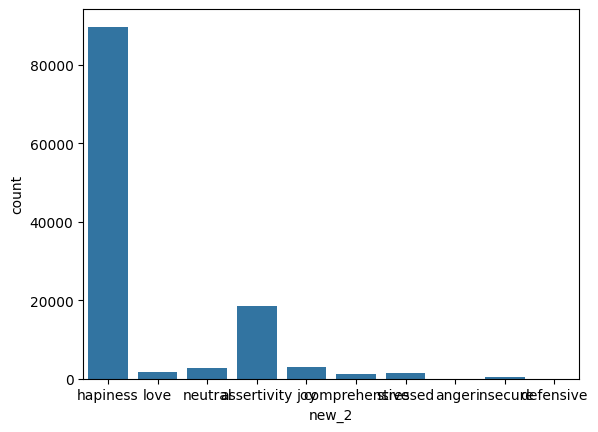

In [88]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x = df_2.new_2)
#plt.xticks(rotate=0.5)

<Axes: xlabel='emotion', ylabel='count'>

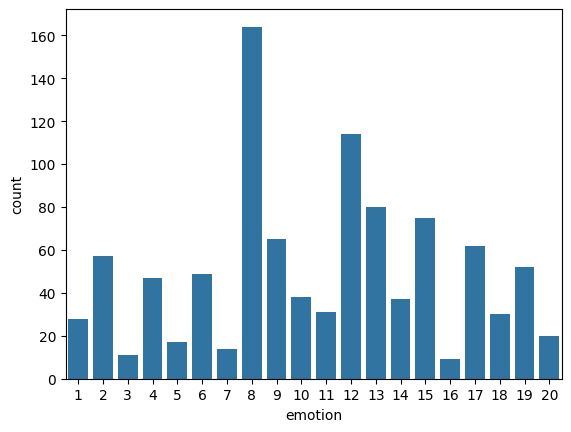

In [57]:
import seaborn as sns
sns.countplot(x=cdf.emotion)